# Laborator 3. Regresia Liniara in Python utilizand Pandas si Scikit-Learn


## Cuprins

1. Selectarea setului de date si .
2. Importarea bibliotecilor si setului de date.
3. Studierea setului de date.
4. Setarea problemei si Pregatirea setului de date pentru antrenare.<br>
   a. Divizare in set de date pentru antrenare si set de date pentru testare. <br>
   b. Utilizarea k-folds cross validation pentru testare.
5. Initializarea modelului de regresie liniara si aplicarea acestuia pe datele noastre.
6. Concluzii.

## Importarea bibliotecilor si setului de date

In [13]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

incarcam fisierul .csv intr-un dataframe |
daca la voi nu e csv, incercati mai intai sa-l transformati in csv


In [14]:
data = pd.read_csv('test.csv')
data


,extranet,intranet,unit,mol
0,22,91,65,29
1,33,22,32,79
2,66,15,23,67
3,68,81,62,94
4,95,68,68,59
...,...,...,...,...
195,29,26,56,23
196,6,35,44,60
197,99,68,82,34
198,11,2,13,59


## Studierea setului de date prin manipularea acestuia

Hai sa vizualizam datele, grafic

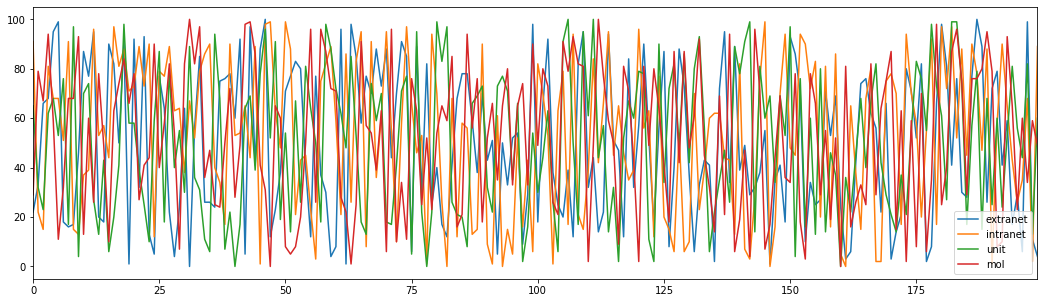

In [15]:
data.plot(figsize=(18,5)) # figsize este marimea dreptunghiului unde este afisat graficul (latimea si lungimea)

## Anomalii in anumite coloane (Muntii din grafic)

Anomaliile din date sunt niste valori extreme ale unor caracteristici. <br>
Valorile extreme, de obicei, apar in rezulatatul unui experiment eronat, sau chiar poate fi o valoare corecta.
Cel mai bine este sa le stergem.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1DB52E30>,
      dtype=object)

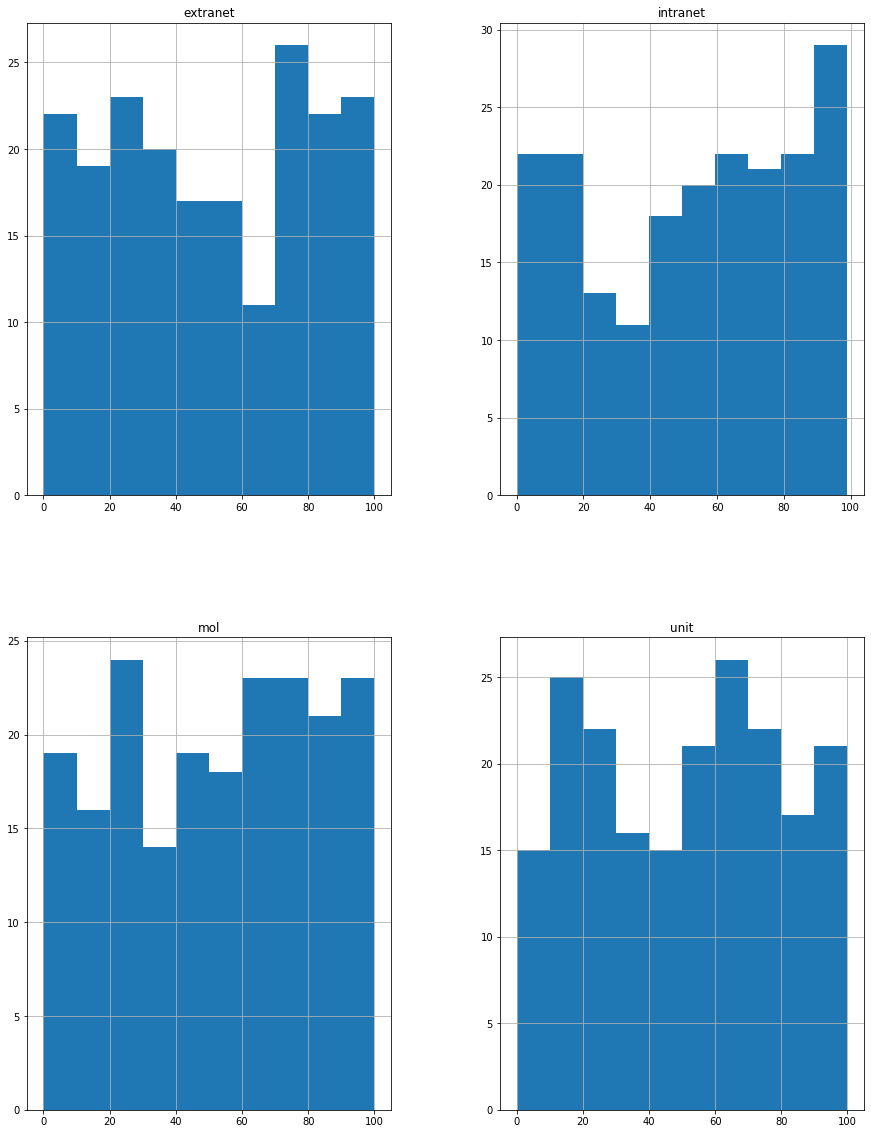

In [16]:
data.hist(figsize = (15,20))

## Definirea problemei de regresie


Precizam raportul veniturilo intre exranet si intranet

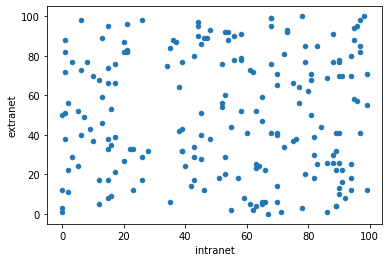

In [17]:
XY=data[['extranet','intranet']]
XY.plot.scatter(y = 'extranet', x = 'intranet')

In [18]:
XY.corr()

,extranet,intranet
extranet,1.000000,0.005475
intranet,0.005475,1.000000


In [19]:
model = LinearRegression()

In [20]:
X = data[['extranet', 'intranet', 'unit']]
Y = data.as_matrix(['mol'])

c:\users\home\desktop\ai-python\lab2\env\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [21]:
model = model.fit(X,Y)
model.predict([[200, 20, 15]])
#model.predict(np.array([[200]])

array([[37.25567027]])

Calculam repatart

In [22]:
scores = []
kfold = KFold(n_splits=5, shuffle=True, random_state=40)
for i, (train, test) in enumerate(kfold.split(X, Y)):
     scores.append(model.score(X, Y))
print(scores)

[0.01739483683014953, 0.01739483683014953, 0.01739483683014953, 0.01739483683014953, 0.01739483683014953]


In [23]:
x = data['extranet'].values.reshape(-1,1)
y = data['intranet'].values.reshape(-1,1)

predictions = LinearRegression()
predictions.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

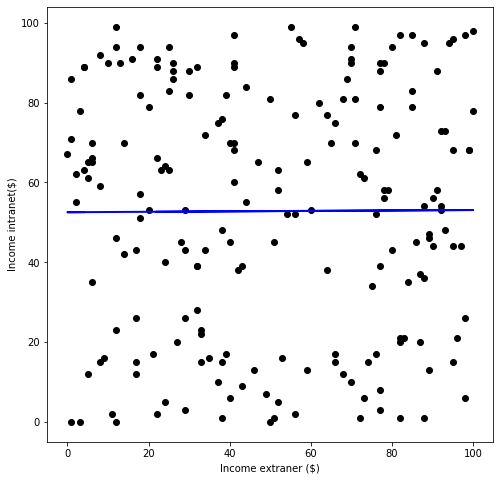

In [24]:
predictions = predictions.predict(x)

plt.figure(figsize=(8, 8))
plt.scatter(data['extranet'],data['intranet'],c='black'
)
plt.plot(data['extranet'],predictions,c='blue',linewidth=2
)
plt.xlabel("Income extraner ($)")
plt.ylabel("Income intranet($)")
plt.show()

In acest laborator am studiat analiza de regresie, aceasta este un instrument de modelare statistică, folosit pentru a determina un model al legăturilor care se stabilesc între perechi de date numerice.
#r patrat indică cât de bine sunt ajustate datele cu modelul, din rezultatele obtinute observam ca modelul are date #corecte.